Import

In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.impute import KNNImputer

In [116]:
# Charger le dataset
df_base = pd.read_csv('data.csv', sep=';')
pd.set_option('display.max_columns', None) 
df = df_base.drop_duplicates()
df.columns = df.columns.str.lower()

Dataviz pré traitement

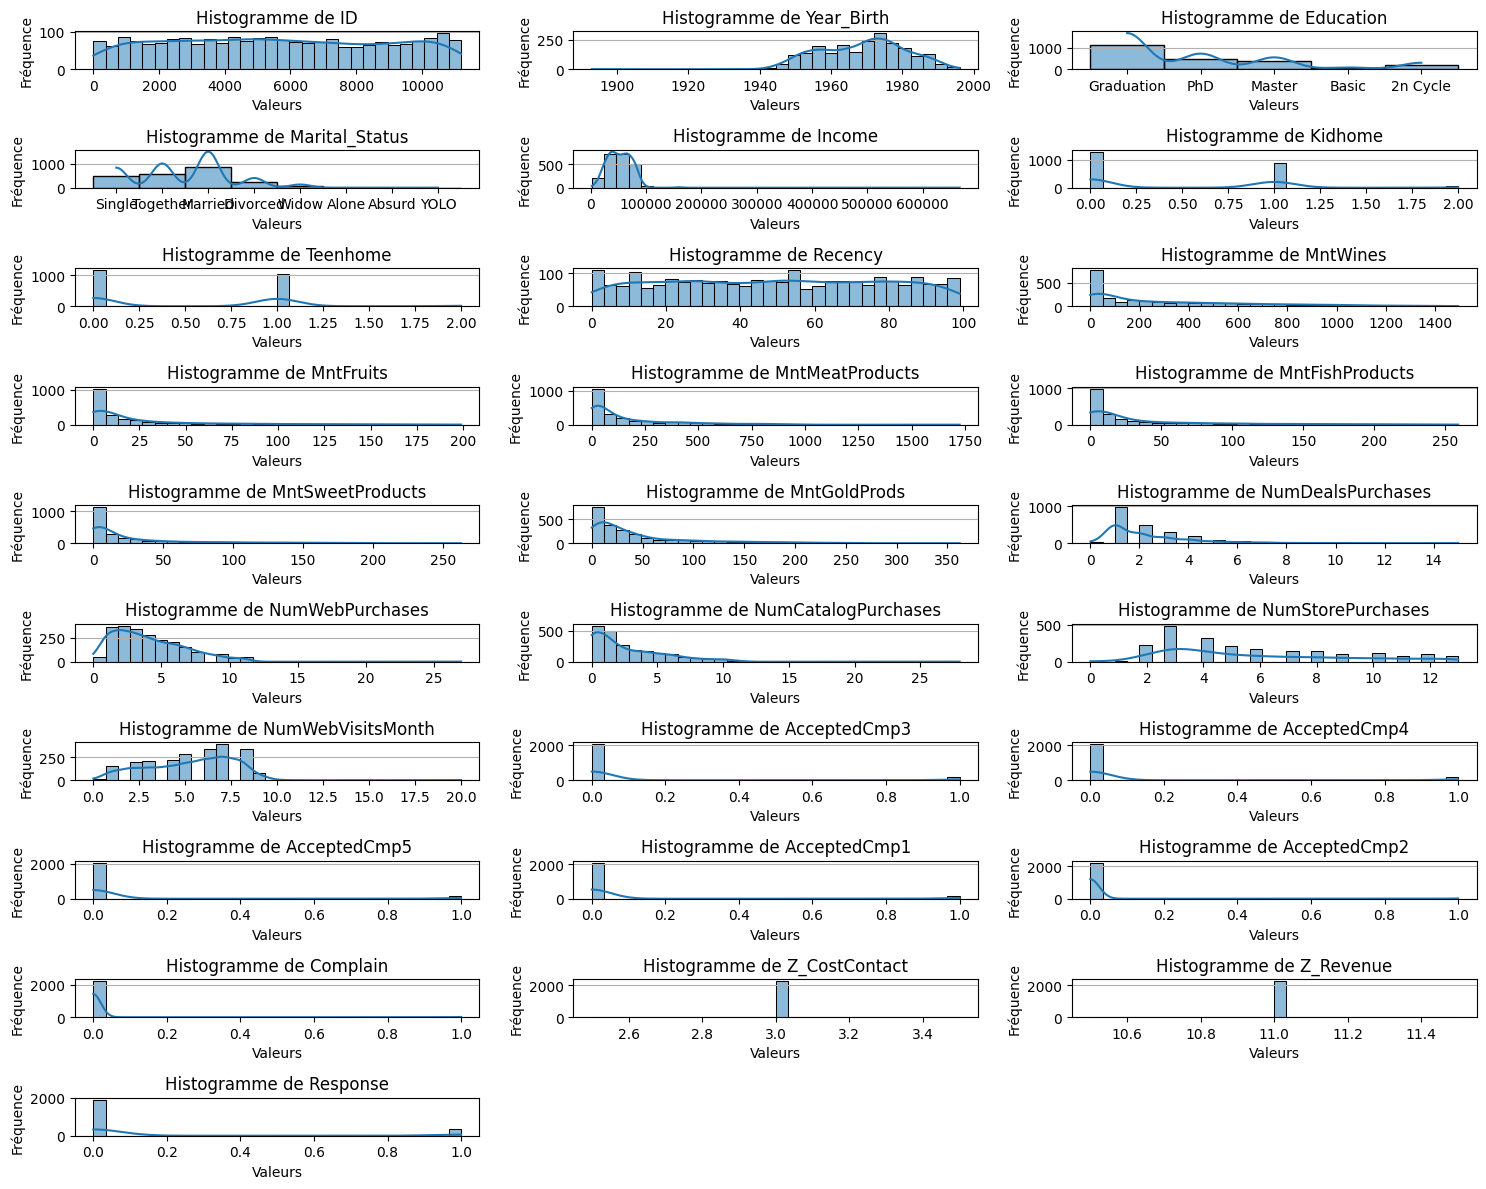

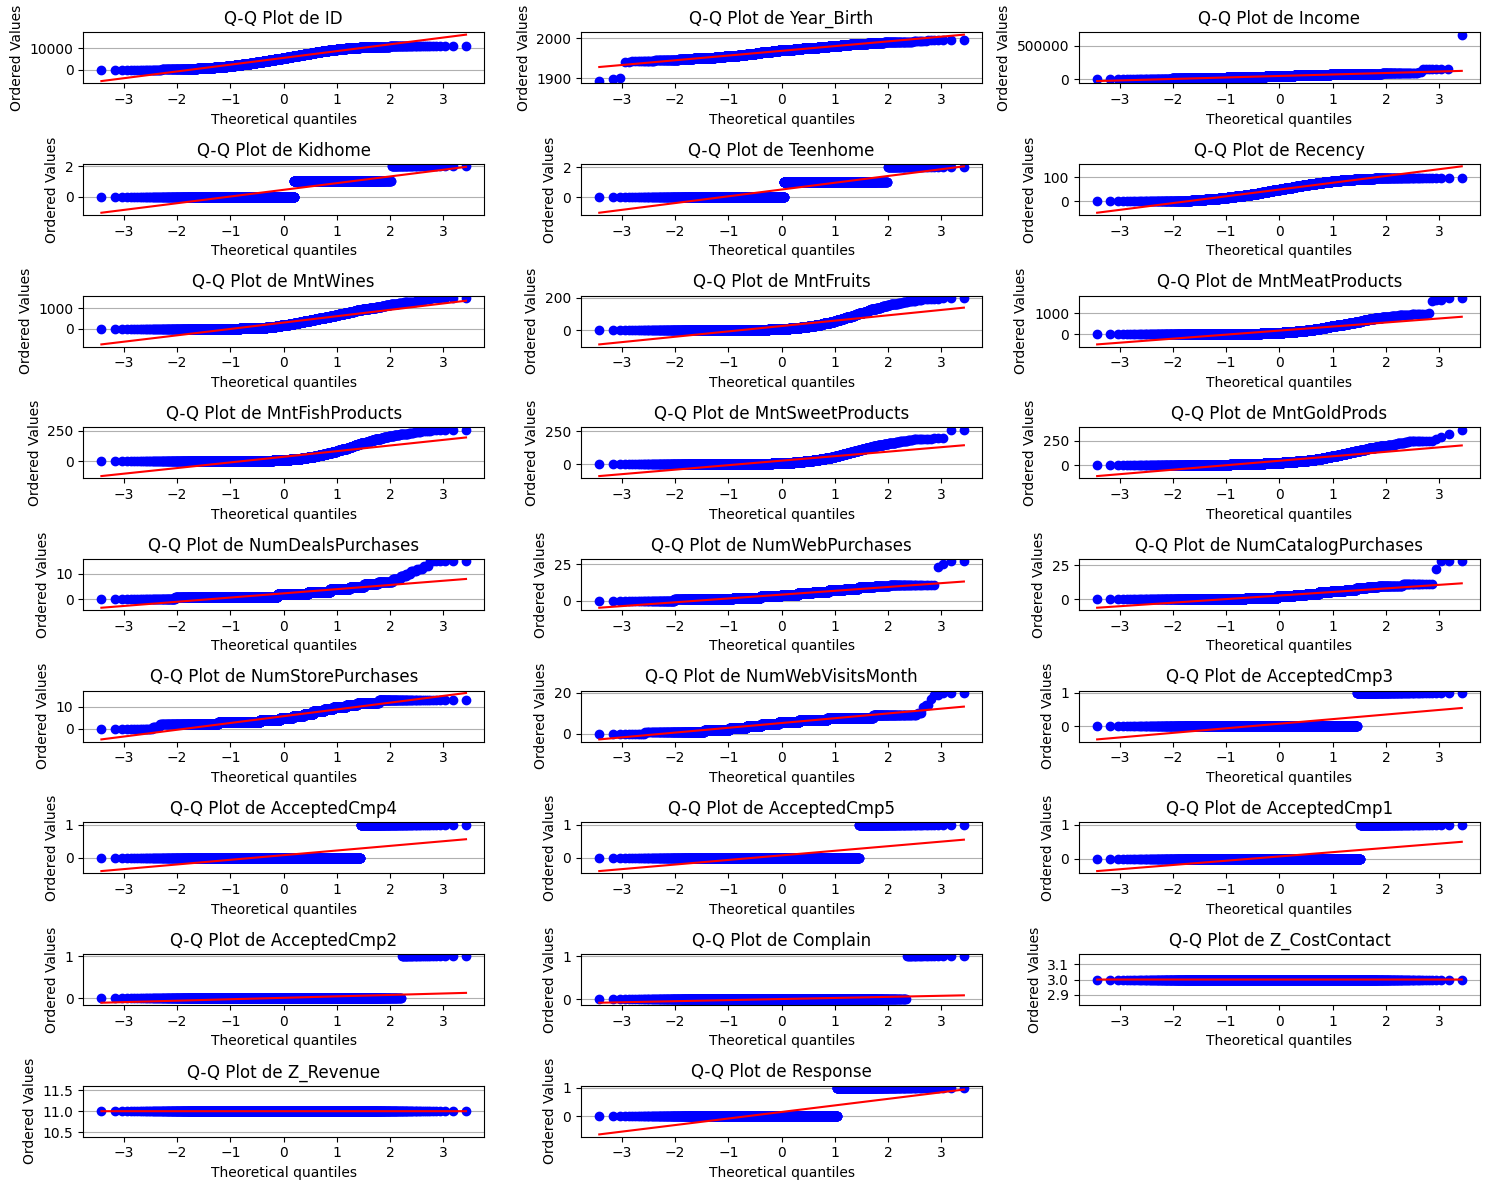

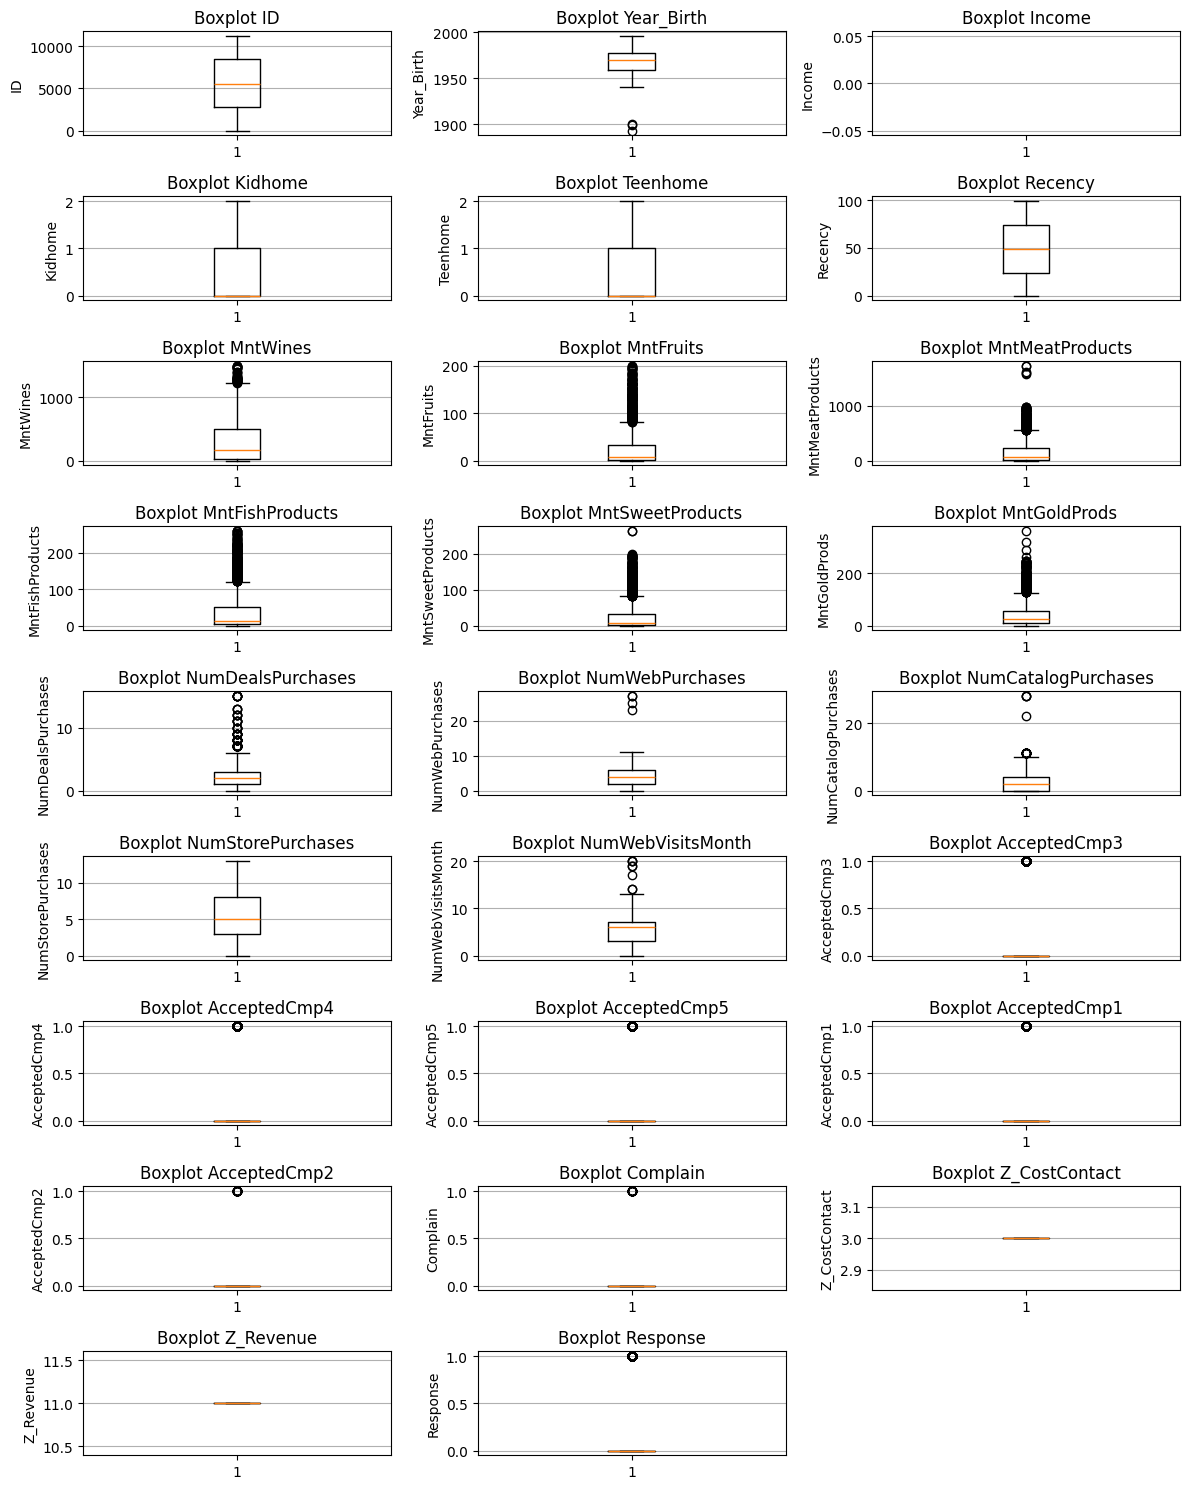

In [154]:
# Distribution des valeurs
cols = df_base.drop(columns='Dt_Customer').columns

# Définir le nombre de lignes et de colonnes pour les subplots
n_cols = 3
n_rows = len(cols) // n_cols + (len(cols) % n_cols > 0)  # Arrondi vers le haut si besoin
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Boucle à travers les colonnes pour créer des histogrammes
for i, col in enumerate(cols):
    sns.histplot(df_base[col], bins=30, kde=True, ax=axes[i])  # Utiliser l'axe spécifique
    axes[i].set_title(f'Histogramme de {str(col)}')
    axes[i].set_xlabel('Valeurs')
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(axis='y')

# Supprimer les axes inutilisés (s'ils existent)
if len(cols) < len(axes):
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes
plt.show()
# Supposons que df_base est déjà défini et que tu as les colonnes que tu veux analyser
cols = lambda: [
    col for col in df_base.columns if pd.api.types.is_numeric_dtype(df_base[col]) and (df_base[col] != 0).any() #verif si la colonne a des valeurs numérique + si pas de valeur == 0
]
res_cols = cols()

# Définir le nombre de lignes et de colonnes pour les subplots
n_cols = 3
n_rows = len(res_cols) // n_cols + (len(res_cols) % n_cols > 0)  # Arrondi vers le haut si besoin
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Boucle à travers les colonnes pour créer des Q-Q plots
for i, col in enumerate(res_cols):
    data = df_base[col].dropna()  # Supprimer les NaN
    if len(data) > 1:  # Vérifier que la longueur est suffisante
        stats.probplot(data, dist="norm", plot=axes[i])  # Utiliser l'axe spécifique
        axes[i].set_title(f'Q-Q Plot de {str(col)}')
    else:
        axes[i].set_title(f'Pas assez de données pour {str(col)}')  # Titre pour les colonnes insuffisantes
    axes[i].grid(axis='y')

# Supprimer les axes inutilisés (s'ils existent)
if len(res_cols) < len(axes):
    for j in range(len(res_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes
plt.show()
### Générer boxplot pour valeurs aberrantes

cols = lambda: [
    col for col in df_base.columns if pd.api.types.is_numeric_dtype(df_base[col]) and (df_base[col] != 0).any() #verif si la colonne a des valeurs numérique + si pas de valeur == 0
]
res_cols = cols()

fig, axes = plt.subplots(nrows=len(res_cols)//3 + 1, ncols=3, figsize=(12, 15))  # 3 colonnes, lignes dynamiques

axes = axes.flatten()

for i, col in enumerate(res_cols):
    axes[i].boxplot(df_base[col])
    axes[i].set_title(f'Boxplot {str(col)}')
    axes[i].set_ylabel(str(col))
    axes[i].grid(axis='y')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


EDA

Description générale du dataset:
Nombre total d'observations : 2240
Nombre total de variables : 29
Types de données : 
id                       int64
year_birth               int64
education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response     

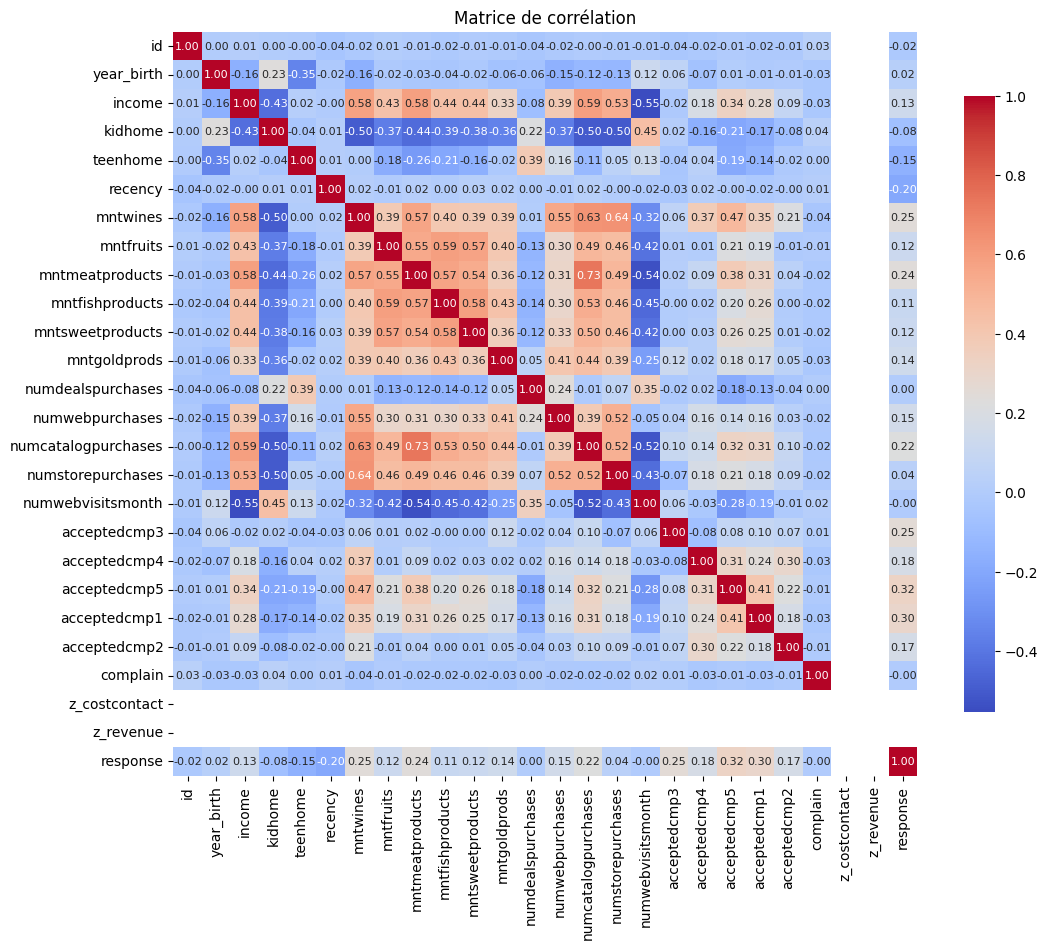

In [117]:
# Description générale du dataset
print("Description générale du dataset:")
print(f"Nombre total d'observations : {df.shape[0]}")
print(f"Nombre total de variables : {df.shape[1]}")
print(f"Types de données : \n{df.dtypes}")

# Liste des variables
print("\nListe des variables:")
print(df.columns.tolist())

# Statistiques descriptives pour les variables numériques
print("\nStatistiques descriptives pour les variables numériques:")
print(df.describe())

# Statistiques descriptives pour les variables catégorielles
print("\nStatistiques descriptives pour les variables catégorielles:")
print(df.describe(include=['object', 'category']))

# Valeurs manquantes
print("\nValeurs manquantes dans le dataset:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Valeurs aberrantes - par exemple pour les variables numériques
print("\nValeurs aberrantes (5 premières lignes) :")
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\nValeurs aberrantes pour {column}:")
    print(df[column][df[column] > df[column].mean() + 2.8 * df[column].std()])  # Z-score > 3

# matrice de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
correlation_matrix = df.drop(columns=['marital_status', 'education', 'dt_customer']).dropna().corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, annot_kws={'size' : 8})
plt.title('Matrice de corrélation')
plt.show()


In [118]:
correlation_matrix[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'complain']]

,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5,complain
id,-0.018219,-0.014994,-0.035890,-0.023933,-0.007064,0.034154
year_birth,-0.009611,-0.006717,0.061784,-0.066109,0.010575,-0.030407
income,0.276820,0.087545,-0.016174,0.184400,0.335943,-0.027225
kidhome,-0.174163,-0.081868,0.016066,-0.162026,-0.205305,0.040978
teenhome,-0.144855,-0.015521,-0.042522,0.038376,-0.190791,0.003307
recency,-0.021061,-0.001400,-0.032257,0.017566,-0.000482,0.013637
mntwines,0.351417,0.206185,0.061463,0.373143,0.473550,-0.039470
mntfruits,0.191816,-0.009980,0.014424,0.006396,0.212871,-0.005324
mntmeatproducts,0.313076,0.043521,0.018438,0.091618,0.376867,-0.023782
mntfishproducts,0.261608,0.002345,-0.000219,0.016105,0.196277,-0.021220


In [119]:
df["z_revenue"].value_counts()

z_revenue
11    2240
Name: count, dtype: int64

In [120]:
# Suppression des variables sans variance
df = df.drop(columns=['z_revenue', 'z_costcontact'])

In [121]:
df.head(
)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


Nouvelles variables

In [122]:
df.rename(columns={'marital_status': 'live_alone'}, inplace=True)

In [123]:
df.rename(columns={'year_birth': 'age'}, inplace=True)
df['age'] = 2024 - df['age']

In [126]:
df['n_children'] = df['kidhome'] + df['teenhome']
for cel in df['live_alone']:
    if cel == 1 :
        df['n_familly'] = df['n_children'] + 1
    else :
        df['n_familly'] = df['n_children'] + 2

df = df.drop(columns= ['kidhome', 'teenhome'])

In [127]:
df['n_accepted_'] = df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5'] 
df = df.drop(columns=['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5'])

In [128]:
df['Dt_Customer_timestamp'] = pd.to_datetime(df['dt_customer']).astype('int64') // 10**9
df = df.drop(columns=['dt_customer'])

In [155]:
df['spent'] = df['mntmeatproducts'] + df['mntfishproducts'] + df['mntsweetproducts'] + df['mntgoldprods']

In [156]:
df

,id,age,education,live_alone,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,n_children,n_familly,n_accepted_,Dt_Customer_timestamp,spent
0,5524,67,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0,2,0,1346716800,894
1,2174,70,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,2,4,0,1394236800,15
2,4141,59,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,2,0,1377043200,301
3,6182,40,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,1,3,0,1391990400,38
4,5324,43,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,1,3,0,1390089600,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,57,Graduation,Married,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,0,1,3,0,1371081600,589
2236,4001,78,PhD,Together,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,0,3,5,1,1402358400,38
2237,7270,43,Graduation,Divorced,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,2,1,1390608000,285
2238,8235,68,Master,Together,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,0,1,3,0,1390521600,385


Remplacer les valeurs aberrantes

In [129]:
for column in df.select_dtypes(include=['float64', 'int64']).columns.drop(columns=['id', 'education', 'complain', 'response']):

    mask = df[column] > df[column].mean() + 2.8 * df[column].std()
    df.loc[mask, column] = np.nan

df.isnull().sum()

TypeError: Index.drop() got an unexpected keyword argument 'column'

Remplacer les valeurs empoisonées

In [130]:
df.head()

,id,age,education,live_alone,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,n_children,n_familly,n_accepted_,Dt_Customer_timestamp
0,5524,67,Graduation,Single,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0,2,0,1346716800
1,2174,70,Graduation,Single,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,2,4,0,1394236800
2,4141,59,Graduation,Together,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,2,0,1377043200
3,6182,40,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,1,3,0,1391990400
4,5324,43,PhD,Married,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,1,3,0,1390089600


In [112]:
df['marital_status'] = df['marital_status'].apply(lambda x: "Married" if (x == "YOLLO" or x == "Absurd" or x == "Together") else x)
df['marital_status'] = df['marital_status'].apply(lambda x: "Single" if (x == "Divorced" or x == "Widow" or x == "Alone") else x)

In [113]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Married,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


KNN Imputer

In [114]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df.drop(columns=['marital_status', 'education', 'dt_customer']))

In [52]:
#Permet de garder les relations entre variables plutot que de simplement remplacer par des moyennes ..

from sklearn.impute import KNNImputer
import pandas as pd

# Supposons que 'Marital_Status', 'Education', 'Dt_Customer' sont des colonnes non numériques ou que tu veux exclure
df_to_impute = df.drop(columns=['marital_status', 'education', 'dt_customer'])

# Initialisation du KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Applique le KNN imputer
df_imputed_array = imputer.fit_transform(df_to_impute)

# Reconversion en DataFrame avec les noms de colonnes originaux
df_imputed = pd.DataFrame(df_imputed_array, columns=df_to_impute.columns, index=df.index)

# Si nécessaire, réinsérer les colonnes non imputées (Marital_Status, Education, Dt_Customer)
df_without_na = pd.concat([df_imputed, df[['marital_status', 'education', 'dt_customer']]], axis=1)

Encoder variable catégorielle

In [53]:
label_encoder = LabelEncoder()
label_encoder.fit(df['marital_status'])
df["marital_status"] = label_encoder.transform(df['marital_status'])

In [54]:
ordinal_encoder = OrdinalEncoder(categories=[['Basic', '2n Cycle', 'Graduation','Master', 'PhD']]) 
df['education'] = ordinal_encoder.fit_transform(df[['education']])

# target_encoder = TargetEncoder(cols=['product_type', 'family_status'], smoothing=1.0)
# df_without_na[['Marital_Status']] = target_encoder.fit_transform(df[['product_type', 'family_status']], df['bad_client_target'])

df_without_na.head()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,marital_status,education,dt_customer
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Single,Graduation,2012-09-04
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Single,Graduation,2014-03-08
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Married,Graduation,2013-08-21
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Married,Graduation,2014-02-10
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Married,PhD,2014-01-19


Dataviz post traitement

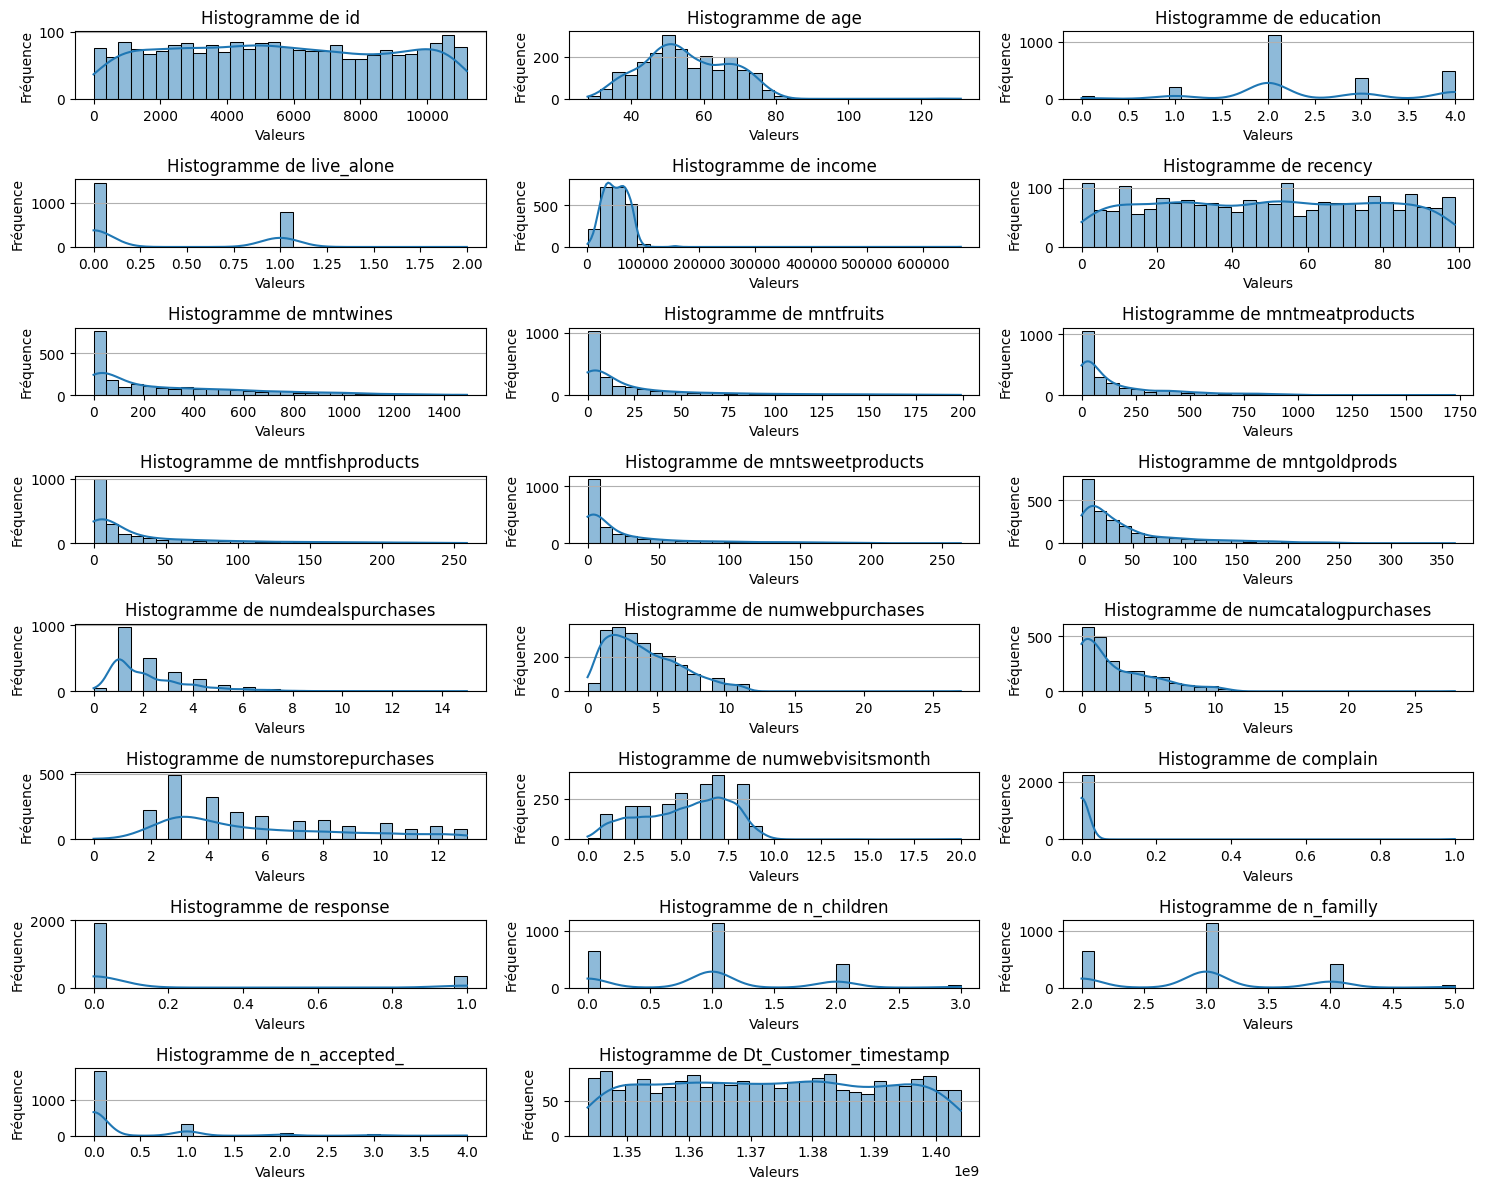

In [ ]:
# Distribution des valeurs
cols = df.columns

# Définir le nombre de lignes et de colonnes pour les subplots
n_cols = 3
n_rows = len(cols) // n_cols + (len(cols) % n_cols > 0)  # Arrondi vers le haut si besoin
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Boucle à travers les colonnes pour créer des histogrammes
for i, col in enumerate(cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  # Utiliser l'axe spécifique
    axes[i].set_title(f'Histogramme de {str(col)}')
    axes[i].set_xlabel('Valeurs')
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(axis='y')

# Supprimer les axes inutilisés (s'ils existent)
if len(cols) < len(axes):
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes
plt.show()

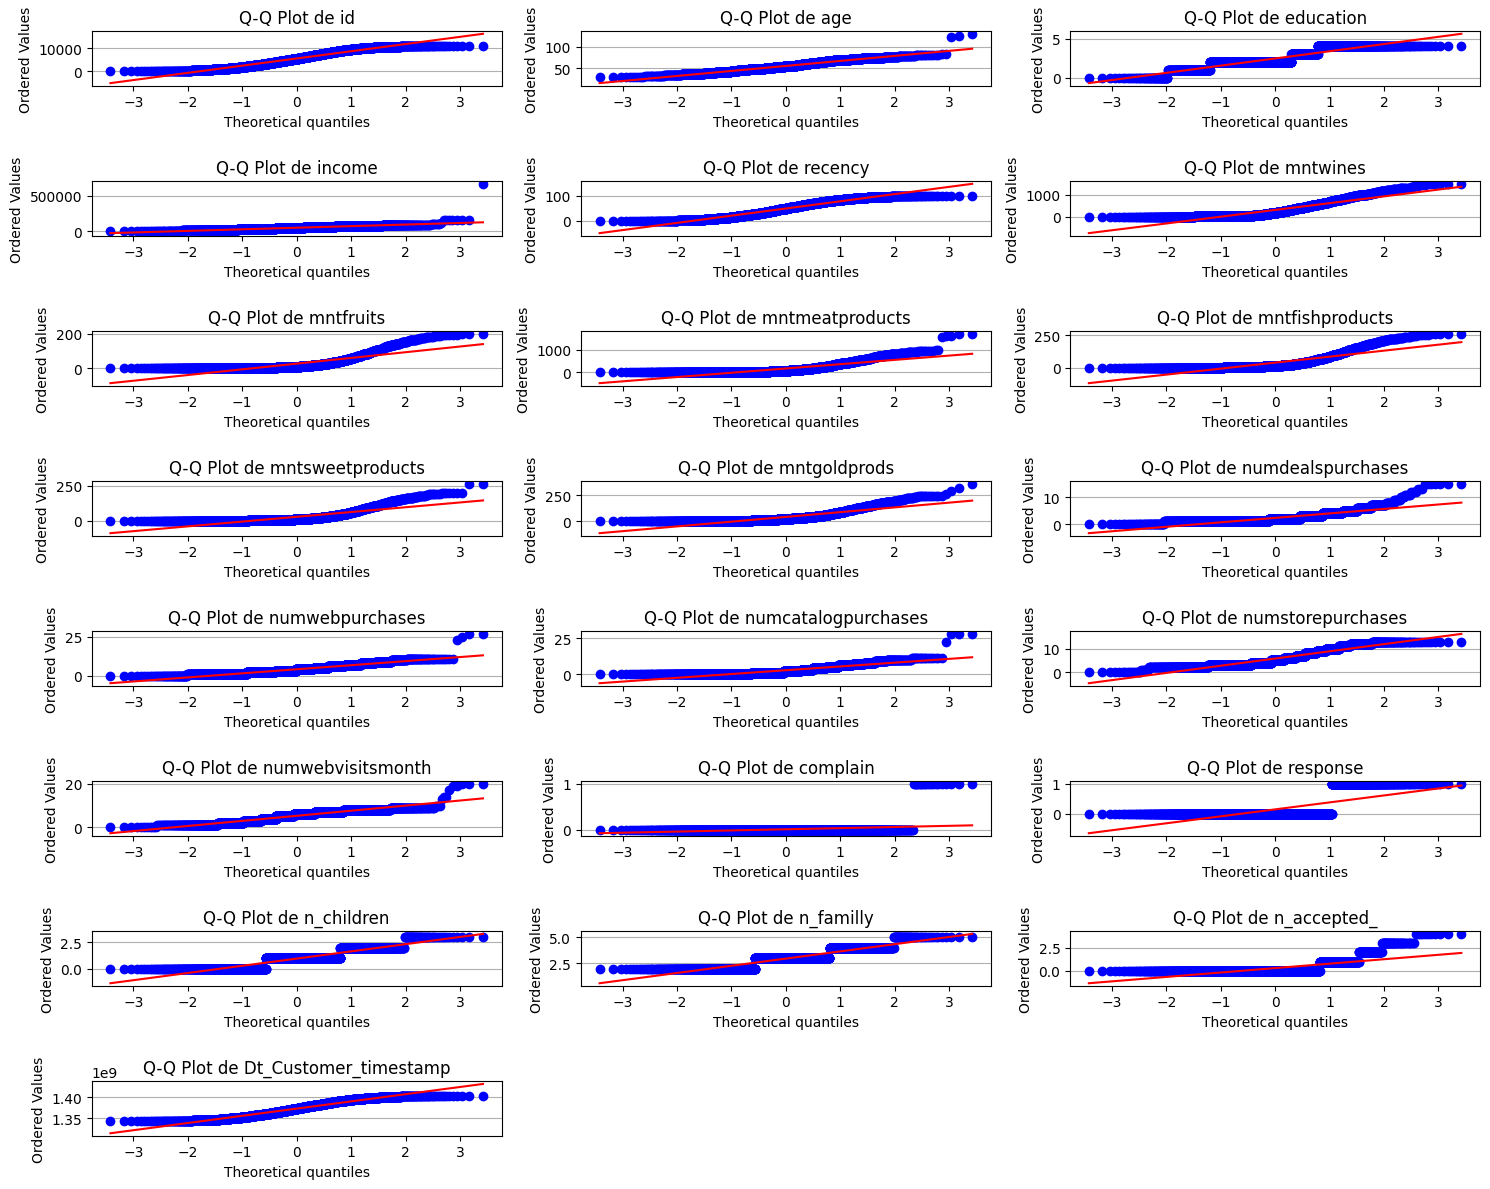

In [ ]:
# Supposons que df est déjà défini et que tu as les colonnes que tu veux analyser
cols = df.drop(columns=['live_alone']).columns

# Définir le nombre de lignes et de colonnes pour les subplots
n_cols = 3
n_rows = len(cols) // n_cols + (len(cols) % n_cols > 0)  # Arrondi vers le haut si besoin
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Boucle à travers les colonnes pour créer des Q-Q plots
for i, col in enumerate(cols):
    data = df[col].dropna()  # Supprimer les NaN
    if len(data) > 1:  # Vérifier que la longueur est suffisante
        stats.probplot(data, dist="norm", plot=axes[i])  # Utiliser l'axe spécifique
        axes[i].set_title(f'Q-Q Plot de {str(col)}')
    else:
        axes[i].set_title(f'Pas assez de données pour {str(col)}')  # Titre pour les colonnes insuffisantes
    axes[i].grid(axis='y')

# Supprimer les axes inutilisés (s'ils existent)
if len(cols) < len(axes):
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes
plt.show()

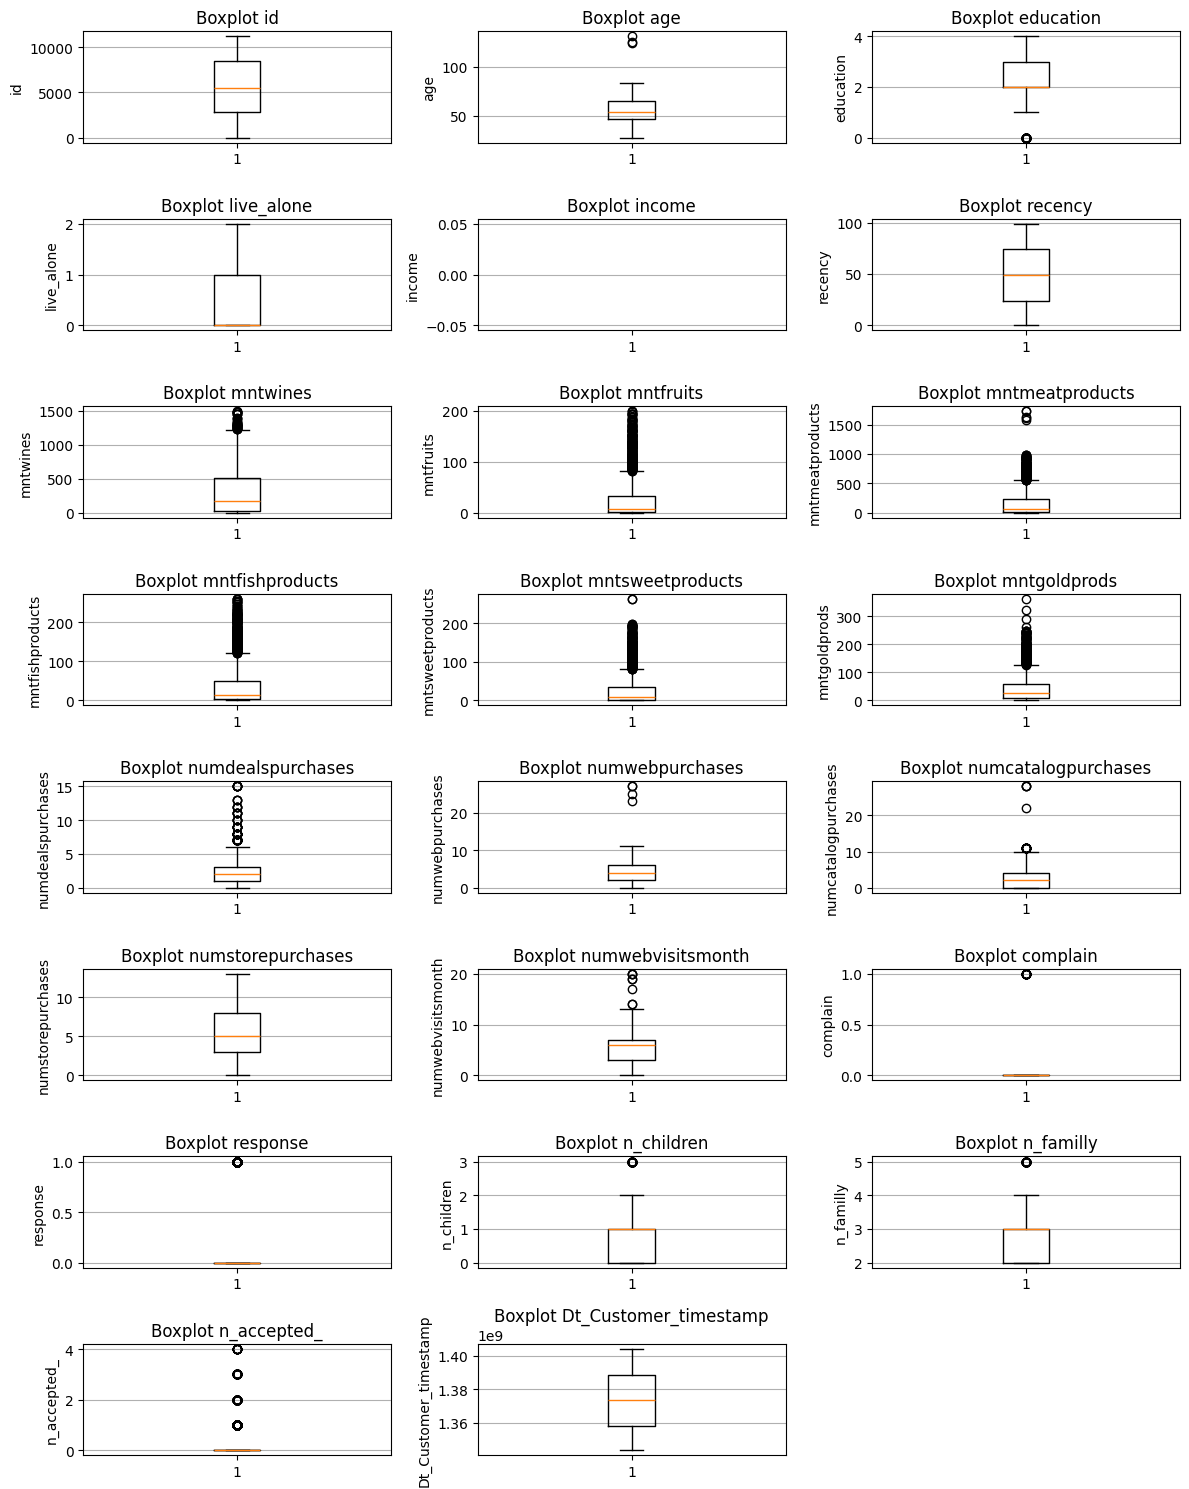

In [ ]:
### Générer boxplot pour valeurs aberrantes

cols = df.columns

fig, axes = plt.subplots(nrows=len(cols)//3 + 1, ncols=3, figsize=(12, 15))  # 3 colonnes, lignes dynamiques

axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot {str(col)}')
    axes[i].set_ylabel(str(col))
    axes[i].grid(axis='y')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Distribution des classes

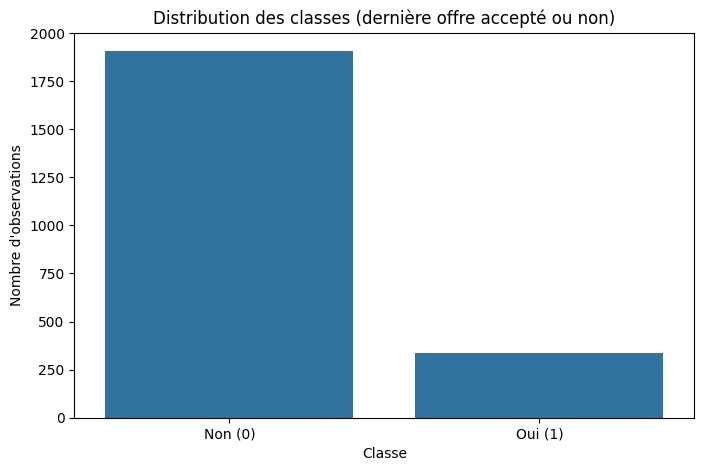

In [68]:
# Distrib classe offre accepté

plt.figure(figsize=(8, 5))
sns.countplot(x='response', data=df)
plt.title('Distribution des classes (dernière offre accepté ou non)')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'observations')
plt.xticks(ticks=[0, 1], labels=['Non (0)', 'Oui (1)'])
plt.show()

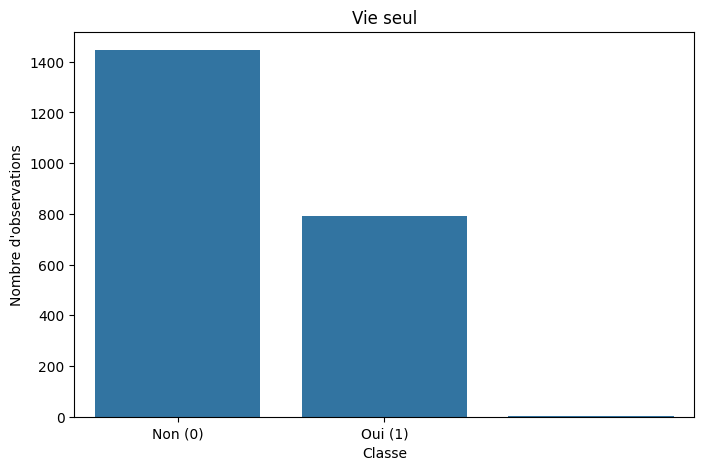

In [69]:
# Distrib classe seul ou en couple

plt.figure(figsize=(8, 5))
sns.countplot(x='live_alone', data=df)
plt.title('Vie seul')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'observations')
plt.xticks(ticks=[0, 1], labels=['Non (0)', 'Oui (1)'])
plt.show()